Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection,Analysis and Preprocessing

In [2]:
insurance_data=pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.shape

(1338, 7)

In [5]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


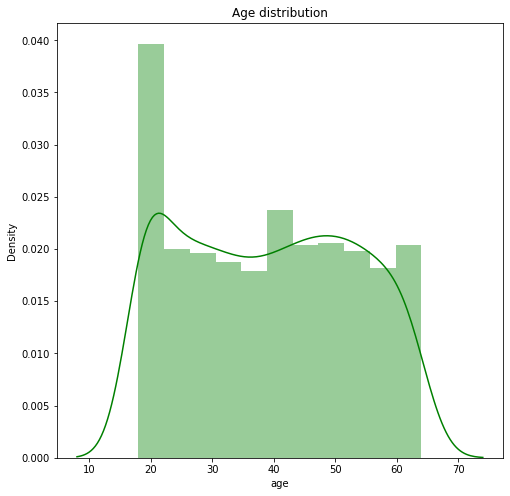

In [9]:
#age distribution
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['age'],color='green')
plt.title('Age distribution')
plt.show()

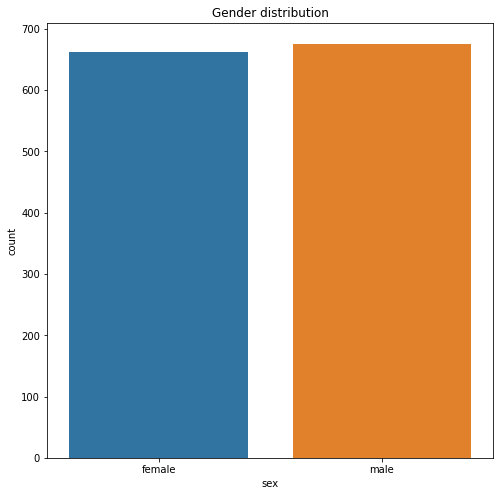

In [11]:
#gender distribution
plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=insurance_data)
plt.title('Gender distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


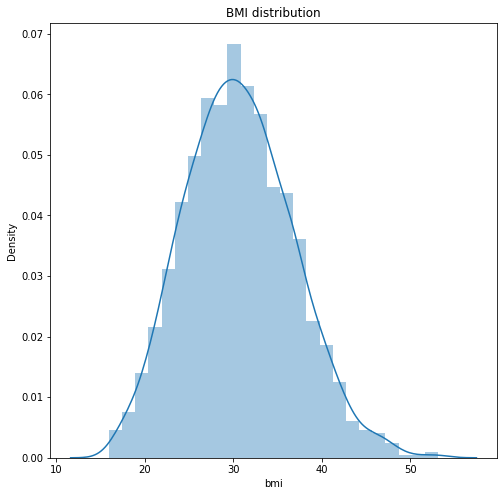

In [12]:
#bmi distribution
plt.figure(figsize=(8,8))
sns.distplot(insurance_data['bmi'])
plt.title('BMI distribution')
plt.show()                                              #normal distribution is displayed

In [22]:
#encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}, 'smoker':{'yes':0,'no':1}, 'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [23]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [24]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,1,3,10600.5483
1334,18,1,31.92,0,1,2,2205.9808
1335,18,1,36.85,0,1,0,1629.8335
1336,21,1,25.80,0,1,1,2007.9450
1337,61,1,29.07,0,0,3,29141.3603


Splitting Features and Label

In [25]:
X=insurance_data.drop(columns='charges',axis=1)
Y=insurance_data['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training and Testing data

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

In [28]:
model=LinearRegression()

In [29]:
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [30]:
training_data_prediction=model.predict(X_train)

In [31]:
#R squared value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R squared error:',r2_train)

R squared error: 0.751505643411174


In [33]:
test_data_prediction=model.predict(X_test)

In [34]:
#R squared value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R squared error:',r2_test)

R squared error: 0.7447273869684077


Making a Predictive System

In [40]:
input_data=(31,1,25.74,0,1,0)

input_data_as_nparray=np.asarray(input_data)

input_data_reshaped=input_data_as_nparray.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)
print('The insurance cost in USD:',prediction[0])

[3760.0805765]
The insurance cost in USD: 3760.0805764960605


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
